In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Data
----------

In [8]:
df = pd.read_csv('../Notebooks/results_compiled.csv', )
DATASET = 'MNIST'
df = df[df.Dataset == DATASET]
df.head()
print(df.shape)

(131, 18)


## Clean Up and Adding Derived Columns
---------

In [9]:
#df['Optimizer'] = pd.Series([x.strip() for x in df.Optimizer])
#df['ModelType'] = df['Model'] + "_" + df['Num_layers']
#df['Efficiency'] = (df['Best_test'] / (df['Best_test_at'] + 1))*np.sqrt((1e9 - df['Num_parameters']))
df.sort_values('Best_test')


,Unnamed: 0,Dataset,Backprop,Model,Num_layers,Batchsize,LearningRate,TotalEpochs,Num_parameters,Optimizer,Best_train,Best_test,Best_test_at,Avg_time,Initialization,ModelType,ID,Efficiency
72,93,MNIST,backprop,kan,2layers,4096,0.0500,98,254080,SGDM,0.864380,0.860474,49,8.321815,kaiming_normal,kan_2layers,750,0.001383
106,151,MNIST,backprop,kan,4layers,4096,0.0500,98,1109120,Adam,0.956473,0.938721,20,8.510626,kaiming_normal,kan_4layers,750,0.003212
107,152,MNIST,backprop,kan,4layers,4096,0.0500,98,1109120,Adam,0.957450,0.939697,41,8.570663,kaiming_uniform,kan_4layers,750,0.001607
111,156,MNIST,backprop,kan,4layers,4096,0.0500,98,1109120,SGD,0.952410,0.940796,12,8.570006,kaiming_uniform,kan_4layers,750,0.005200
103,145,MNIST,backprop,kan,4layers,4096,0.0050,98,1109120,SGDM,0.953666,0.940918,10,8.837049,kaiming_uniform,kan_4layers,750,0.006146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,174,MNIST,backprop,mlpWide,3layers,4096,0.0005,98,712650,SGD,1.000000,0.984619,2,7.479523,kaiming_normal,mlpWide_3layers,750,0.024355
115,175,MNIST,backprop,mlpWide,3layers,4096,0.0005,98,712650,SGDM,0.999983,0.985229,3,7.296944,kaiming_normal,mlpWide_3layers,750,0.018278
119,179,MNIST,backprop,mlpWide,3layers,4096,0.0050,98,712650,SGD,0.999983,0.985229,4,7.296320,kaiming_normal,mlpWide_3layers,750,0.014622
120,180,MNIST,backprop,mlpWide,4layers,4096,0.0050,98,2037450,Adam,0.999965,0.985596,46,7.445019,orthogonal_,mlpWide_4layers,750,0.001444


In [10]:
df['Best_test'] = df['Best_test'].astype('float32')

## Plotting Test Accuracy against Parameters
-----------

                Best_test
Num_parameters           
254080           0.952148
525440           0.965332
1109120          0.968506
---
                Best_test
Num_parameters           
25514            0.967285
52842            0.975586
111594           0.979492
---
                Best_test
Num_parameters           
255050           0.983887
712650           0.985840
2037450          0.985596
---


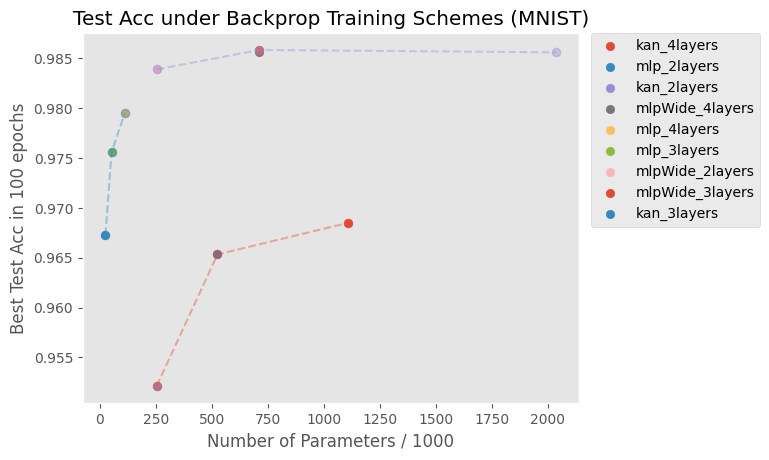

In [17]:
plt.style.use('ggplot')

fig, axes = plt.subplots()


for ma in ['kan_', 'mlp_', 'mlpW']:
    sq = df[df.ModelType.apply(lambda x: x[:4]) ==ma]
    sq = sq[['ModelType', 'Num_parameters', 'Best_test']]
    sq2 = sq.groupby('Num_parameters').max()
    sq2 = sq2[['Best_test']]; print(sq2)
    axes.plot(sq2.index/1000, sq2.Best_test, alpha = 0.4, linestyle='--', linewidth = 1.5, marker = 'o')
    print('---')


for model in set(np.unique(df['ModelType'])):
    sa = df[(df.ModelType ==model)]
    axes.scatter(np.min(sa.Num_parameters/1000), np.max(sa.Best_test), label = model)

#plt.ylim(0.8, 1)
plt.xlabel("Number of Parameters / 1000")
plt.ylabel("Best Test Acc in 100 epochs")
plt.legend(bbox_to_anchor=(1.01, 1.02))
plt.title("Test Acc under Backprop Training Schemes (" + DATASET + ")")
axes.grid()

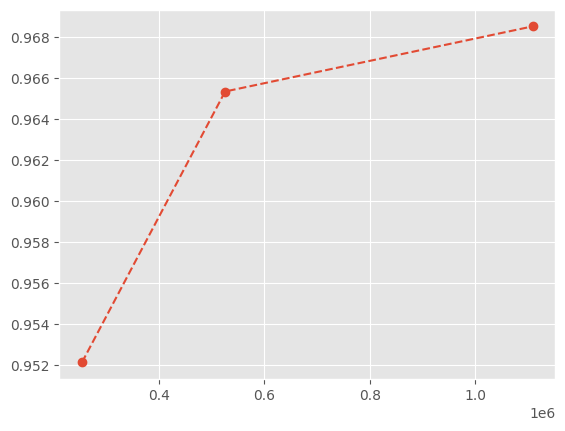

In [12]:
plt.style.use('ggplot')
mn = df[df.ModelType.apply(lambda x: x[:4]) == 'kan_']
mn2 = mn.groupby('Num_parameters').max()
plt.plot(mn2.index, mn2.Best_test, linestyle = '--', marker = 'o')
#plt.plot(np.max(mn.Num_parameters), np.max(mn.Best_test), linestyle='--')
#plt.grid()

## Plotting Efficiency and Epoch Times
-------

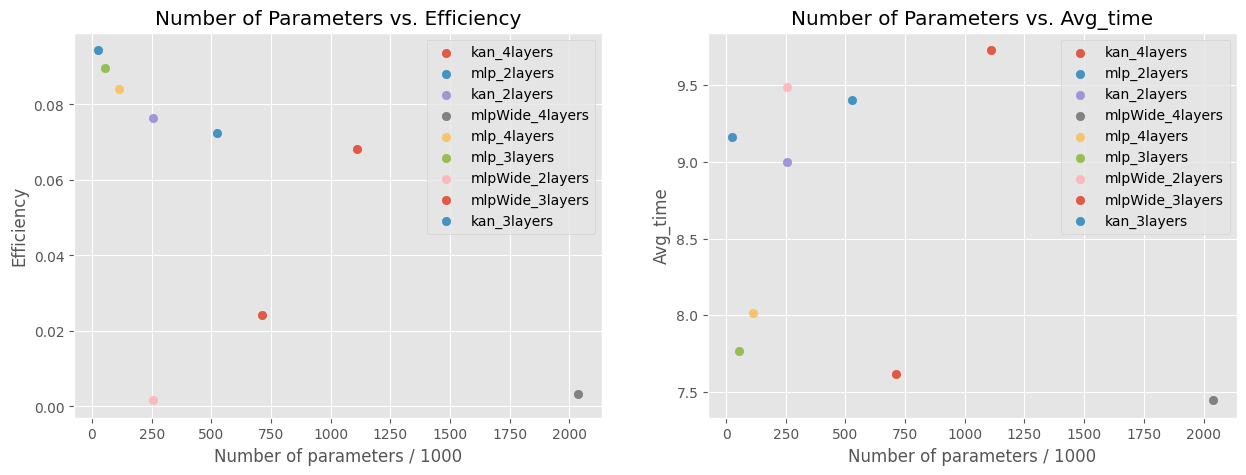

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5)); idx = 0
for metric in ['Efficiency', 'Avg_time']:
    for model in set(np.unique(df['ModelType'])):
        sa = df[(df.ModelType ==model)]
        axes[idx].scatter(np.max(sa.Num_parameters/1000), np.max(sa[metric]), marker = 'o', label = model, alpha = 0.9)
        axes[idx].set_title("Number of Parameters vs. " + metric)
        axes[idx].set_xlabel("Number of parameters / 1000")
        axes[idx].set_ylabel(metric)
        axes[idx].legend()
    idx += 1

## Bar Plot of Best Achieved Model Performance Under Any Training Scheme
------------

Text(0, 0.5, 'Best Achieved Test Performance')

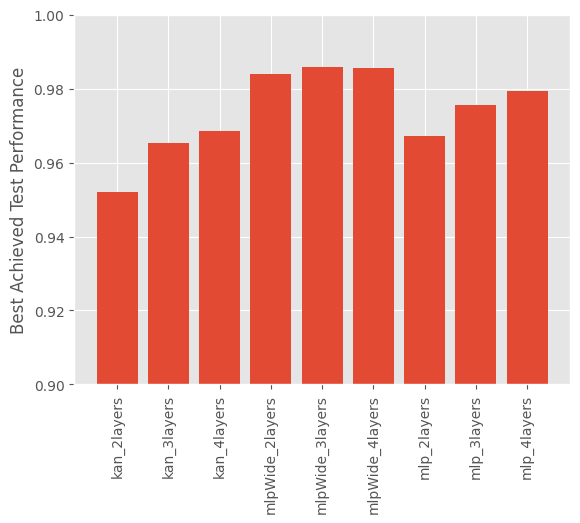

In [14]:
zs = df.groupby("ModelType", group_keys=True)[['Best_test']].max()
plt.bar(zs.index, zs.Best_test); plt.ylim(0.9,1)
plt.xticks(rotation = 90); plt.ylabel("Best Achieved Test Performance")